In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/Sang555/ece228/main/atlantic.csv")
data.head(3)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
!pip3 install update pandas==0.25.3

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 341, in resolve
    name, crit = self._merge_into_c

In [4]:
# Number of unique storms in the database

len(data.ID.unique())

1814

In [5]:
# Viewing the number of entries per storm

data.groupby(by=["ID"]).Name.count()

ID
AL011851    14
AL011852    45
AL011853     1
AL011854    11
AL011855     1
            ..
AL282005    33
AL291969    17
AL292005    42
AL302005    43
AL312005    36
Name: Name, Length: 1814, dtype: int64

In [7]:
# Maximum entries a particular storm has

data.groupby(by=["ID"]).Name.count().max()

133

In [ ]:
# Removing storms with entries less than 6, as we need atleast 5 entries to predict the next entries of the storm

data=data.groupby('ID').filter(lambda x: len(x)>6)

In [9]:
#Number of unique storms in updated HURDAT2

len(data.ID.unique())

1814

In [10]:
#Removing N and W from Lat-Long

data['Latitude1'] = data['Latitude'].str[:-1]
data['Latitude1'] = data['Latitude1'].astype(float)
data['Longitude1'] = data['Longitude'].str[:-1]
data['Longitude1']= data['Longitude1'].astype(float)


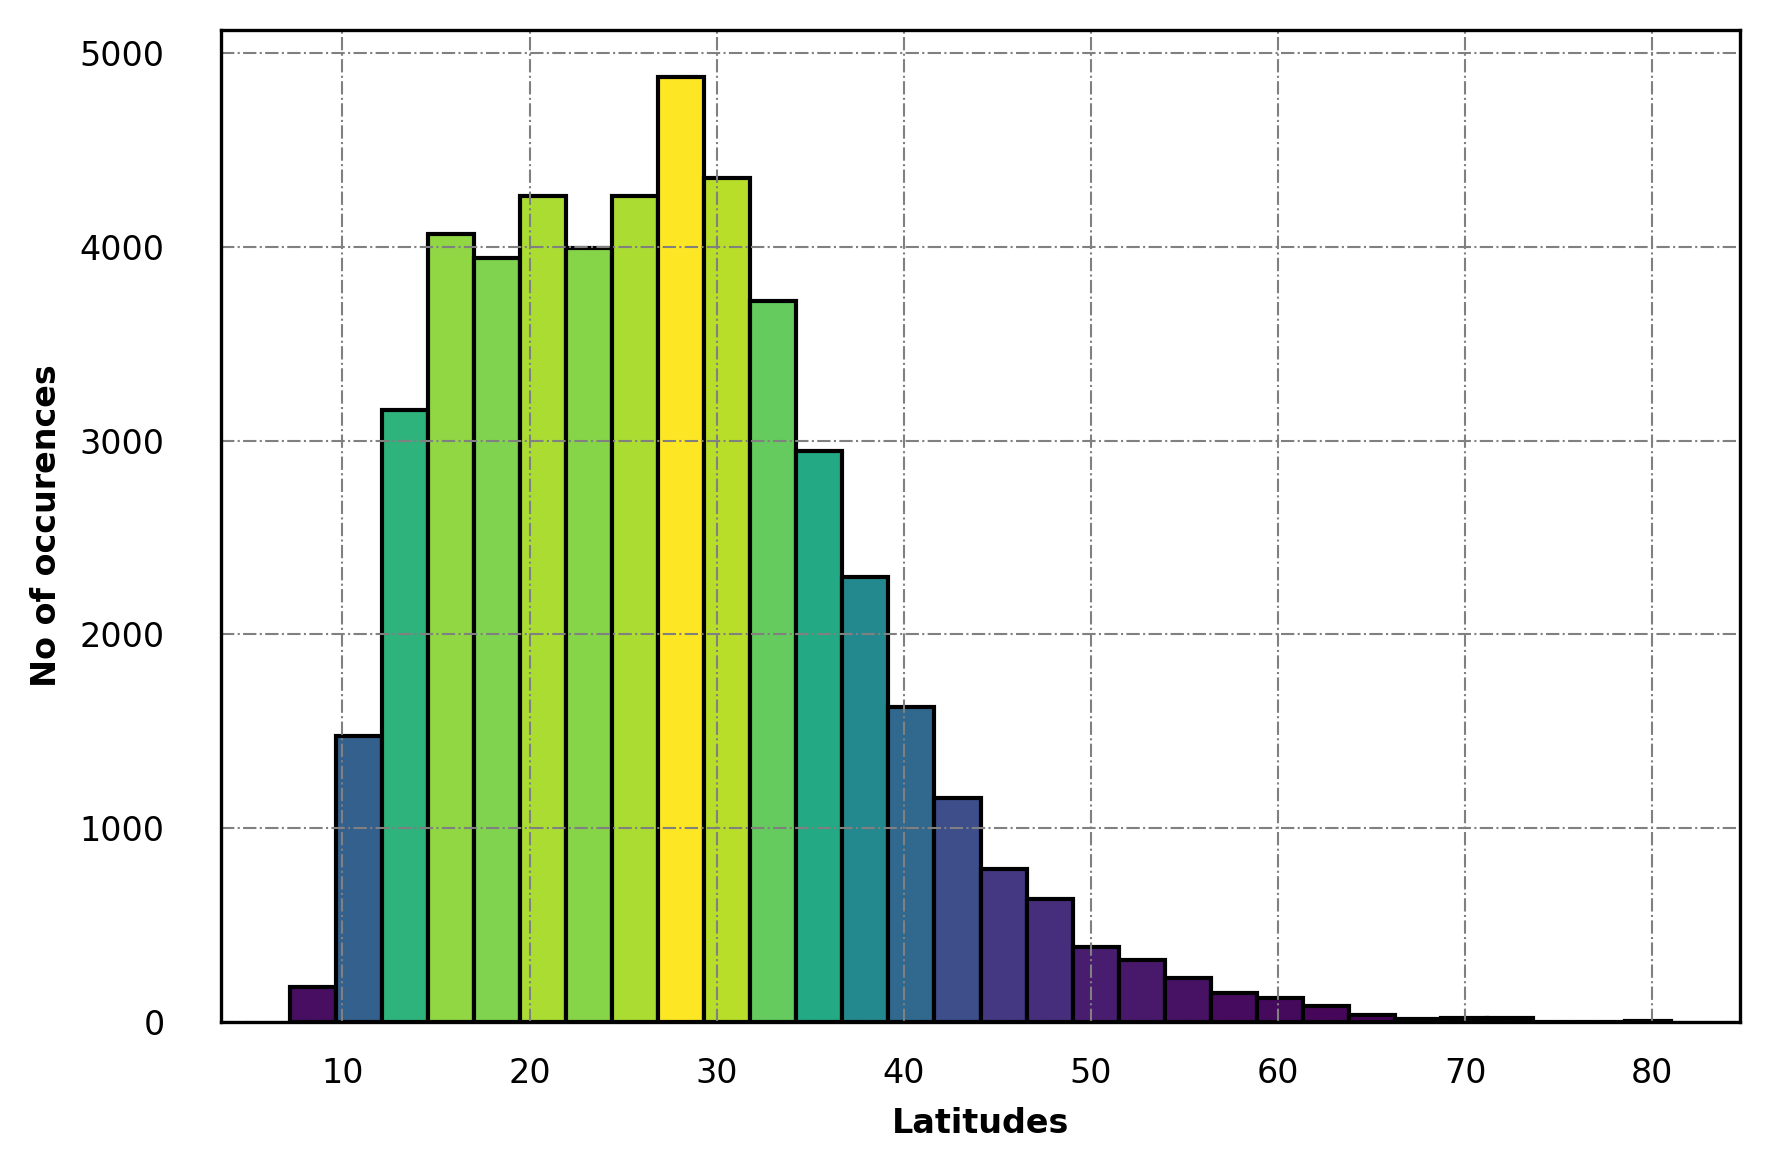

<Figure size 1800x1200 with 0 Axes>

In [27]:
#Histogram of Latitude and Longitude 

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["figure.autolayout"] = True


# Creating histogram
fig, axs = plt.subplots(1, 1,
                        )
 
 
# Remove axes splines

 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        )

# Creating histogram
N, bins, patches = axs.hist(data['Latitude1'], bins=30,edgecolor = "black")

# Setting color
fracs = ((N**(1 )) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.grid(True)
axs.set_xlabel('Latitudes', fontsize=8,fontweight='bold')
axs.set_ylabel('No of occurences', fontsize=8,fontweight='bold')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show plot
plt.show()
plt.savefig("latitude.png")

Text(0, 0.5, 'No of storms-->')

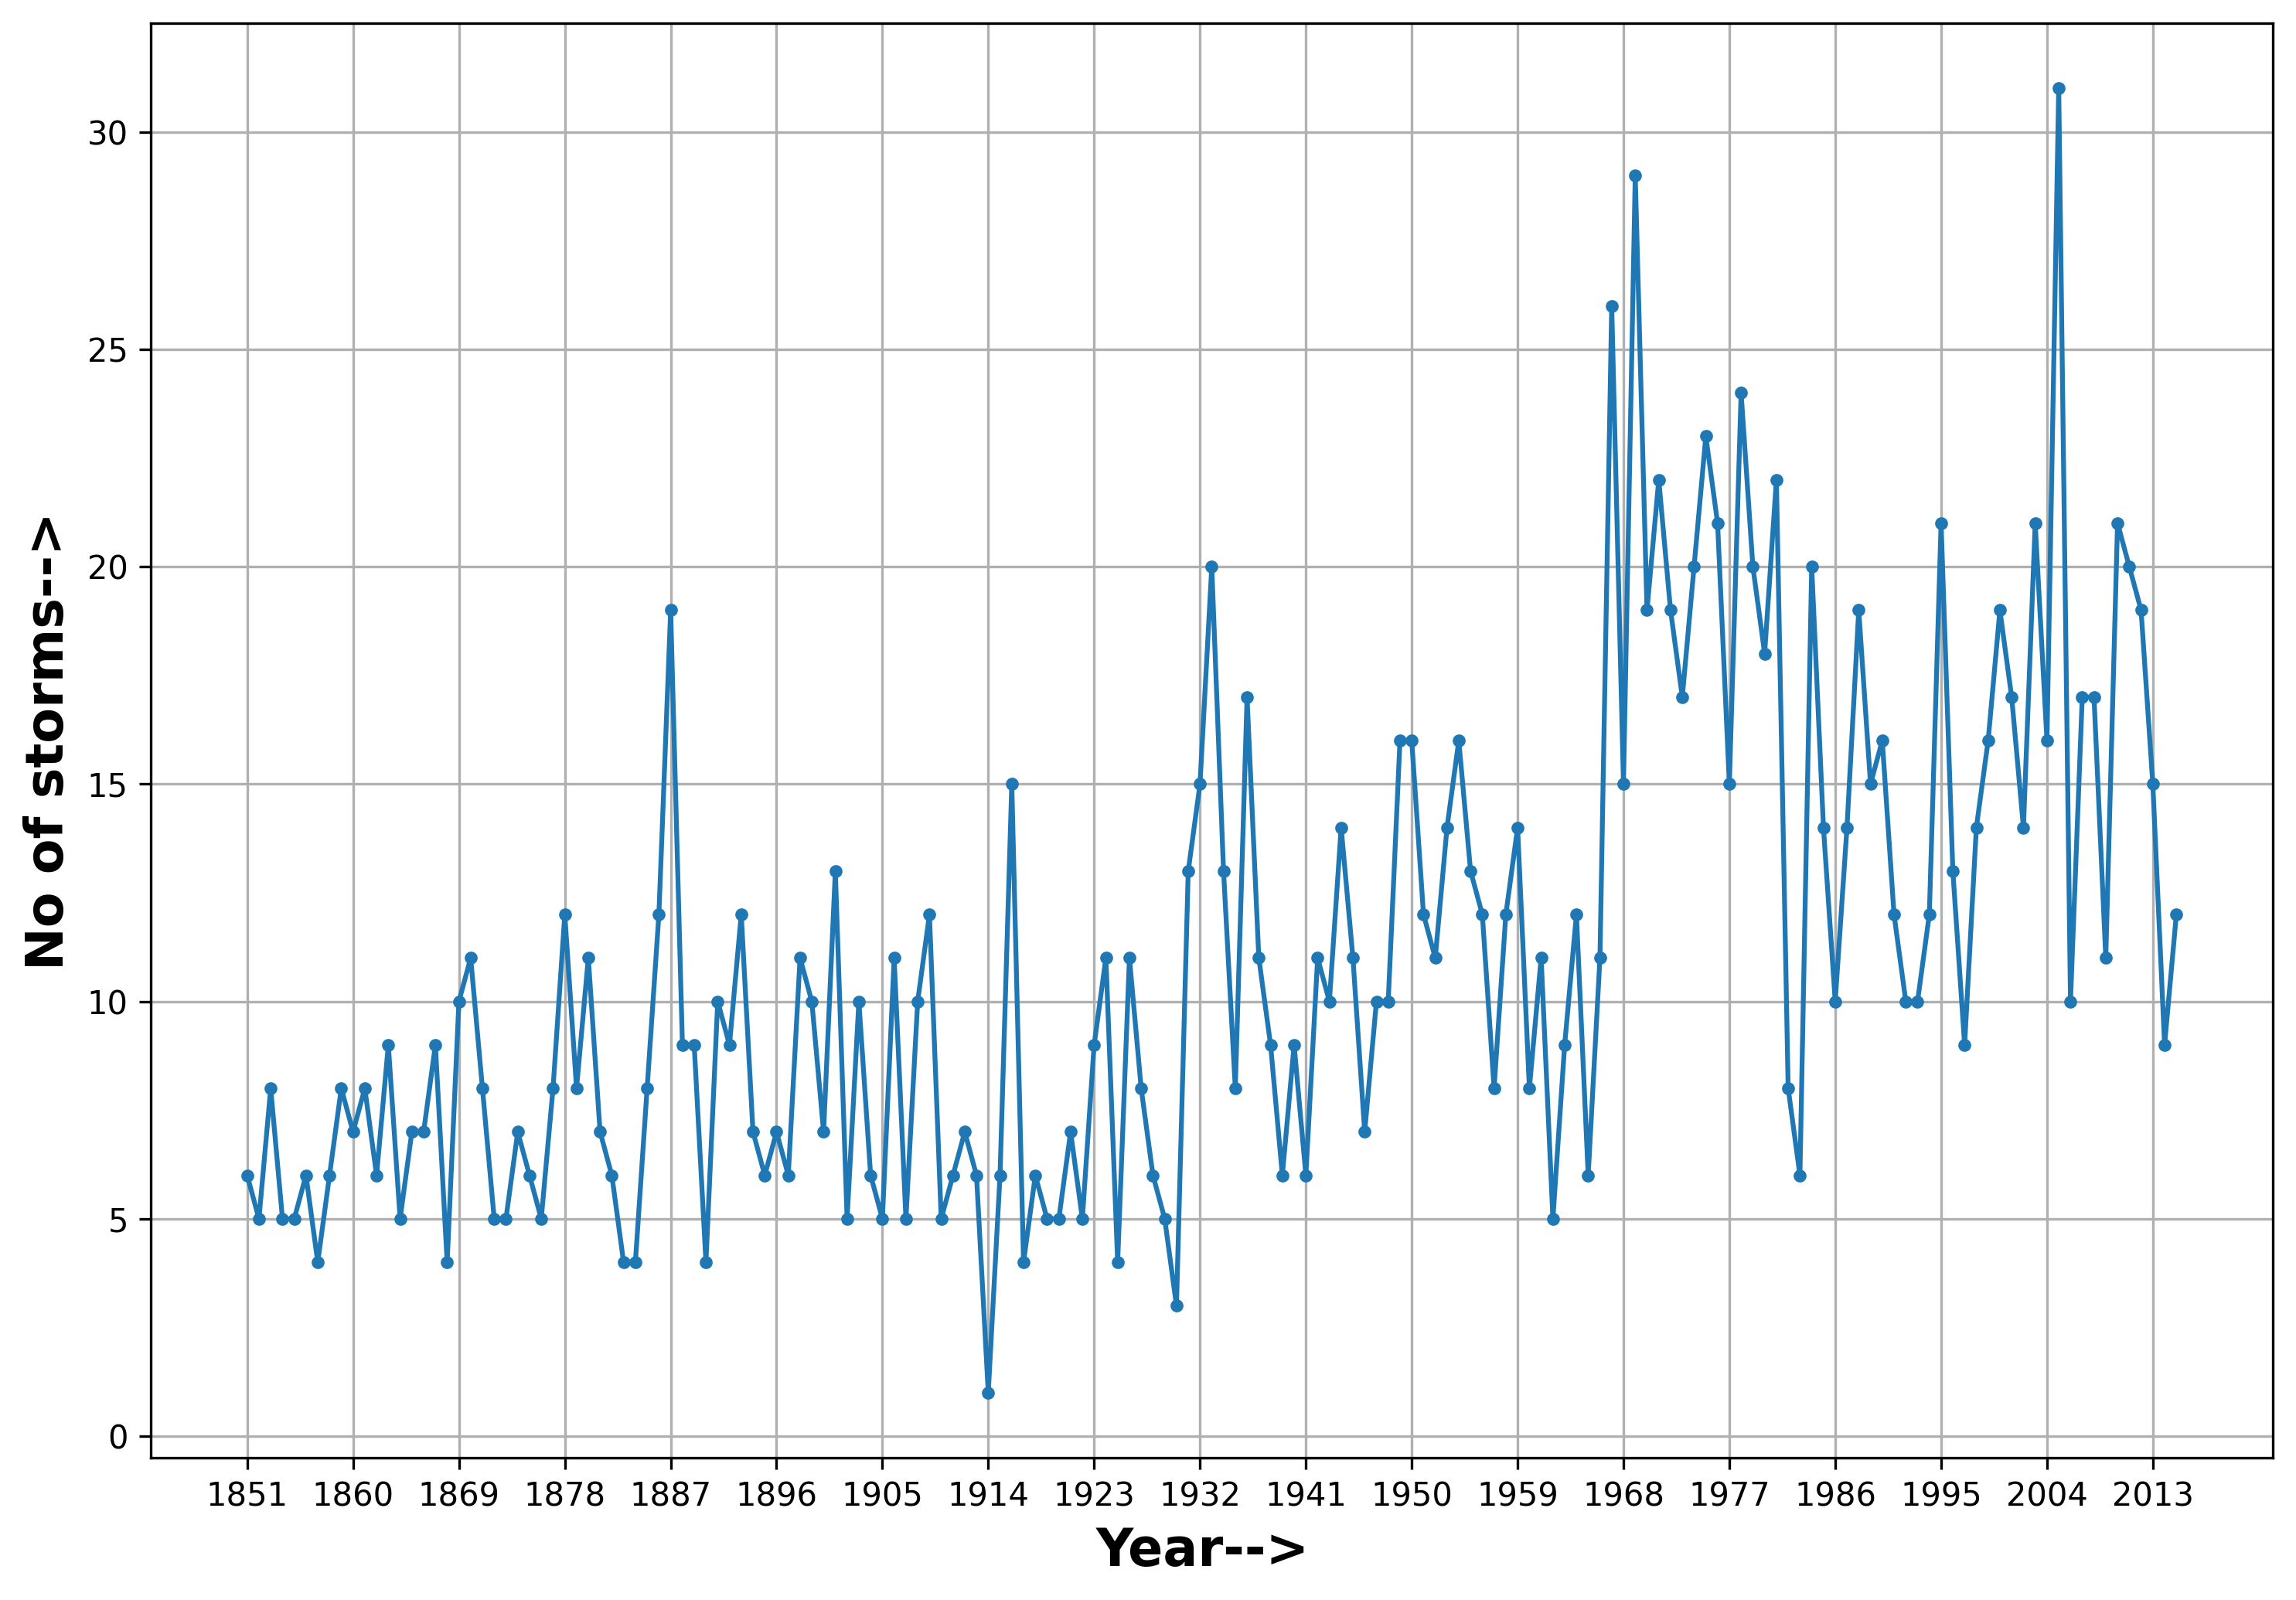

In [29]:
# Plot of the number of hurricanes per year. This information gives us the trends in hurricanes over the years. The graph clearly shows that over the years, the number of hurricanes has increased which can be attributed to global warming. 

data2=data.ID.unique()
data3=data2.astype(str)
x=[u[-4:] for u in data3]
storm_years=np.array(x)
storm_years.astype(int)
s1=np.ndarray.flatten(storm_years)

(unique, counts)=np.unique(s1,return_counts=True)

fig, ax = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
plt.plot(unique,counts,marker = '.')
ax.set_xticks(ax.get_xticks()[::9])

plt.grid(True)
ax.set_xlabel('Year--> ', fontsize=16,fontweight='bold')
ax.set_ylabel('No of storms-->', fontsize=16,fontweight='bold')




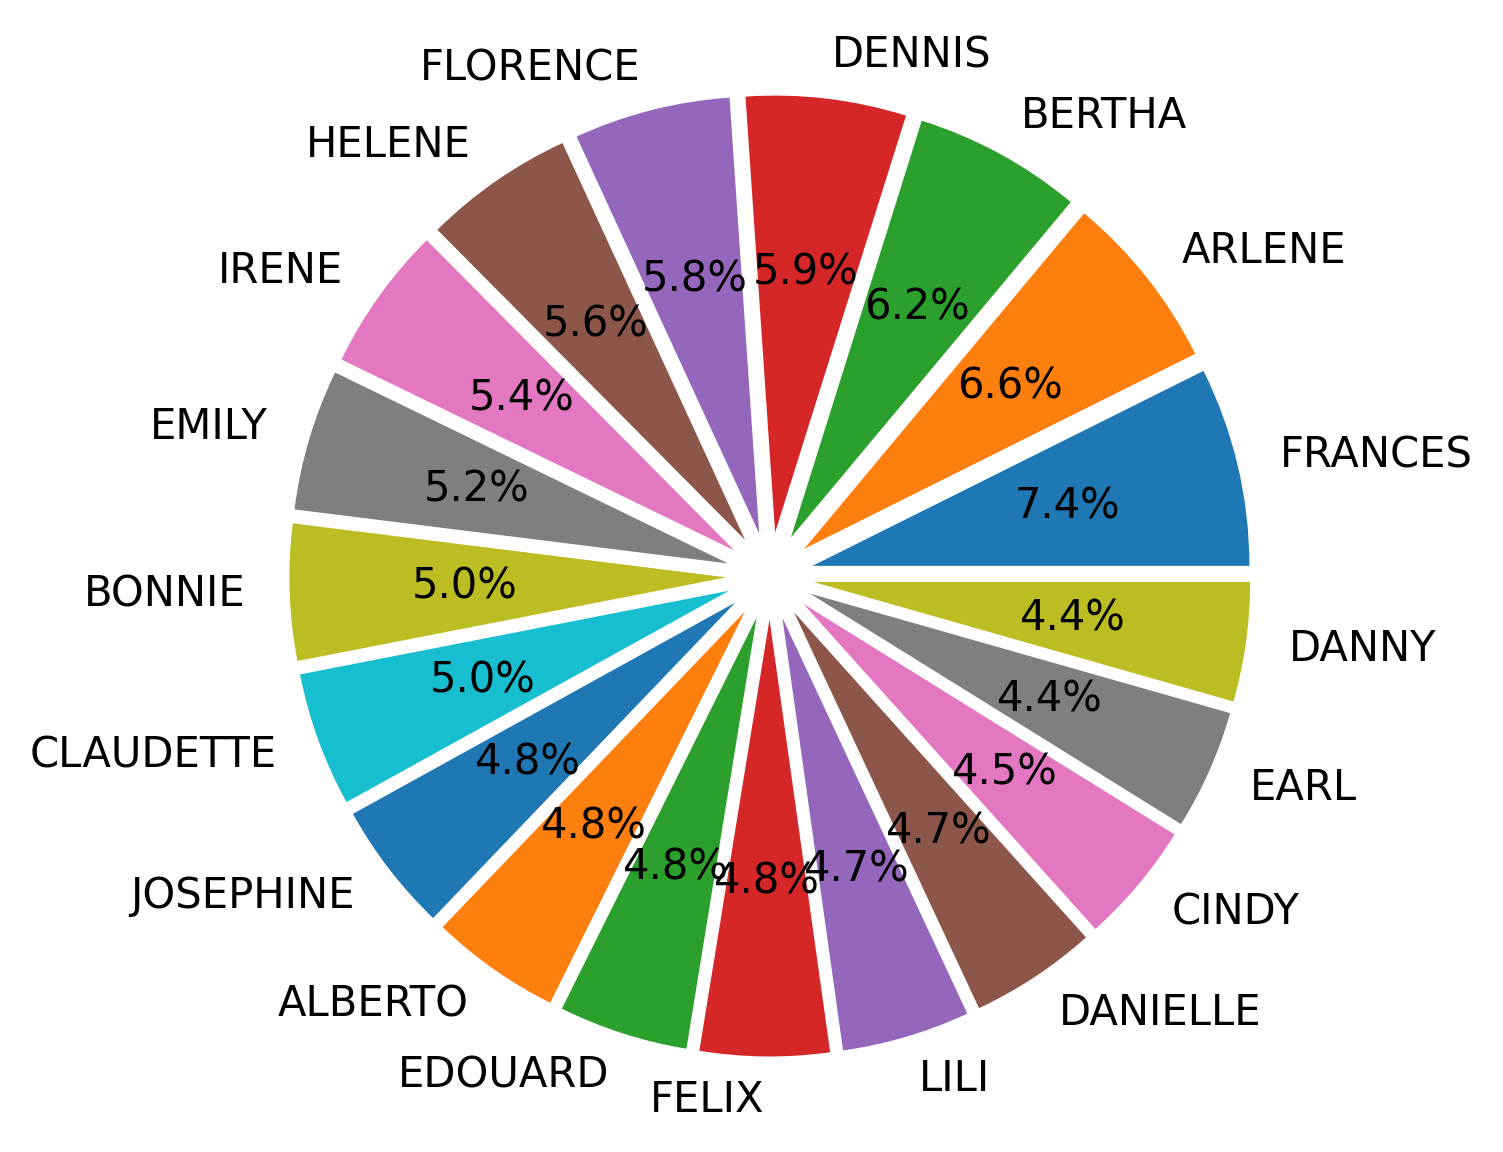

In [32]:
# Visualize the percentage of data available for the storms in HURDAT2. Note that there are many unnamed storms, and hence they have been excluded.

lst = [x.strip() for x in data.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[1:20]]
val = data.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[1:20]['Date'].values

fig , ax =plt.subplots(1, 1,
                        figsize =(5, 3),
                        tight_layout = True)
fig.set_size_inches(5,5)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(19)])
plt.show()

Text(0, 0.5, 'No of data points-->')

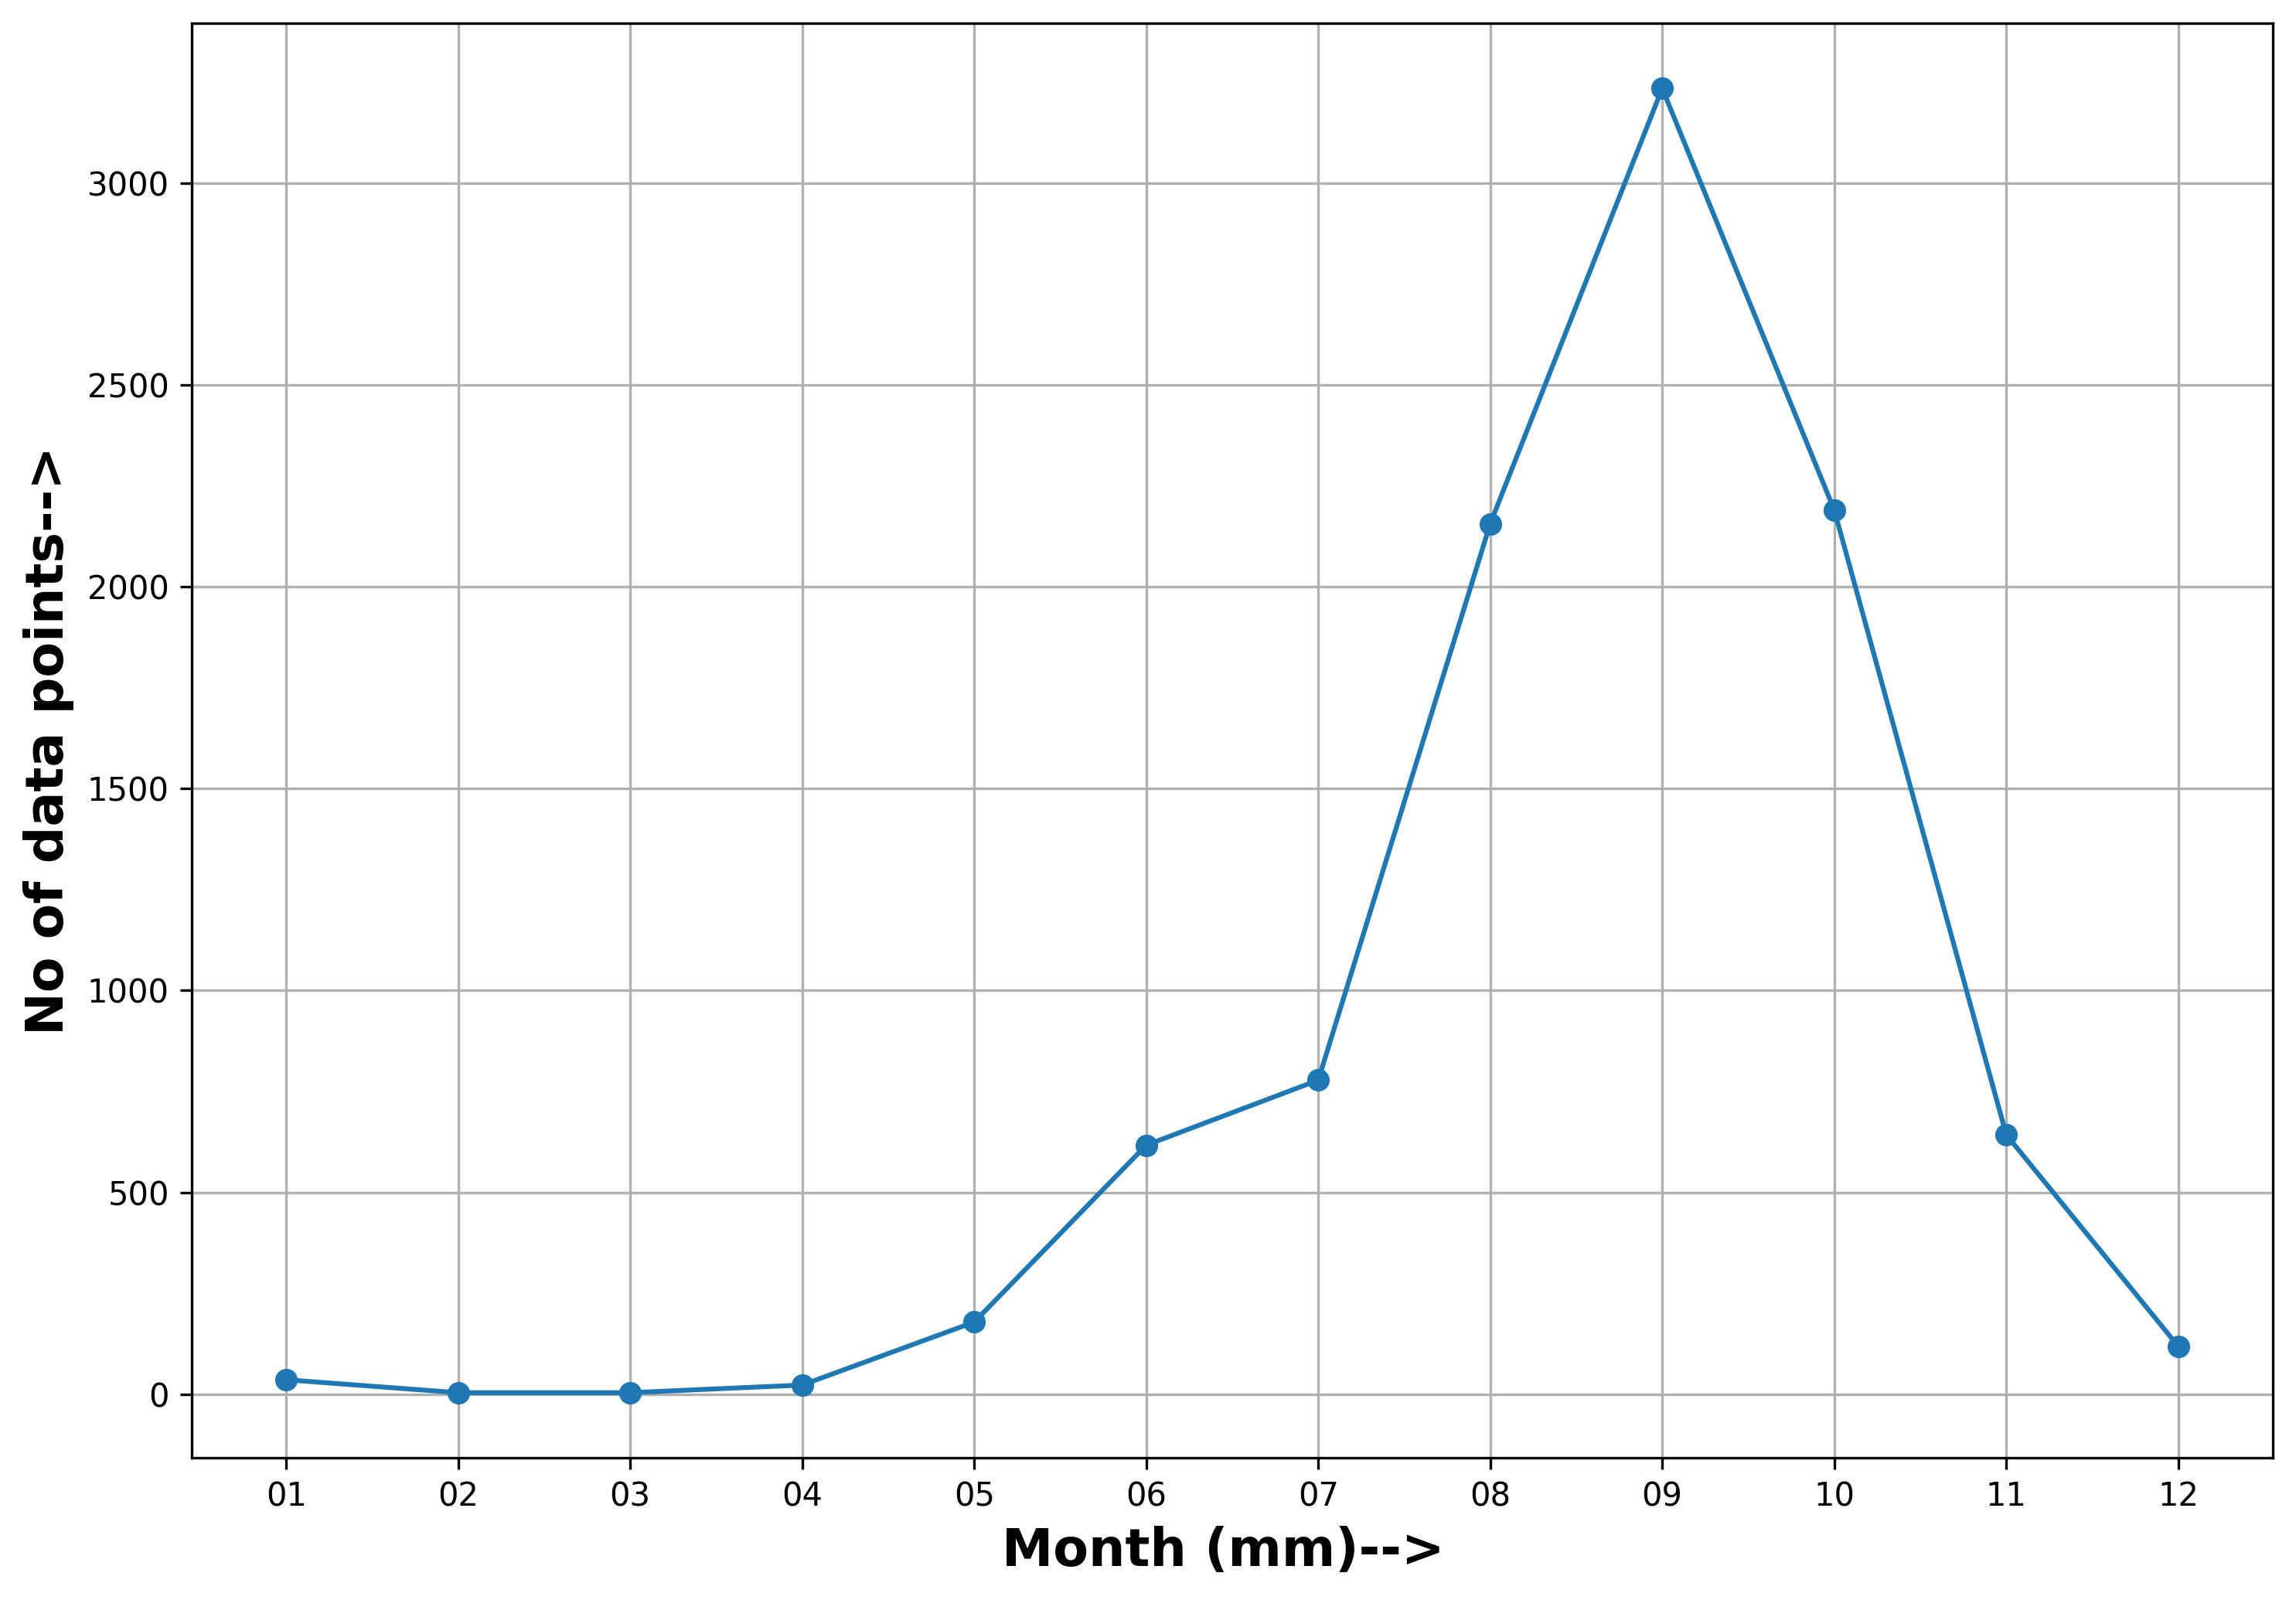

In [33]:
#hurricanes grouped by month. This shows us which is the season for hurricanes.

data_time=data.Date.unique()
data7=data_time.astype(str)
data7
x=[u[4:-2] for u in data7]
storm_months=np.array(x)
storm_months.astype(int)
s1=np.ndarray.flatten(storm_months)

(unique, counts)=np.unique(s1,return_counts=True)

fig, ax = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
plt.plot(unique,counts,marker = 'o')
#ax.set_xticks(ax.get_xticks()[::9])

plt.grid(True)
ax.set_xlabel('Month (mm)--> ', fontsize=16,fontweight='bold')
ax.set_ylabel('No of data points-->', fontsize=16,fontweight='bold')

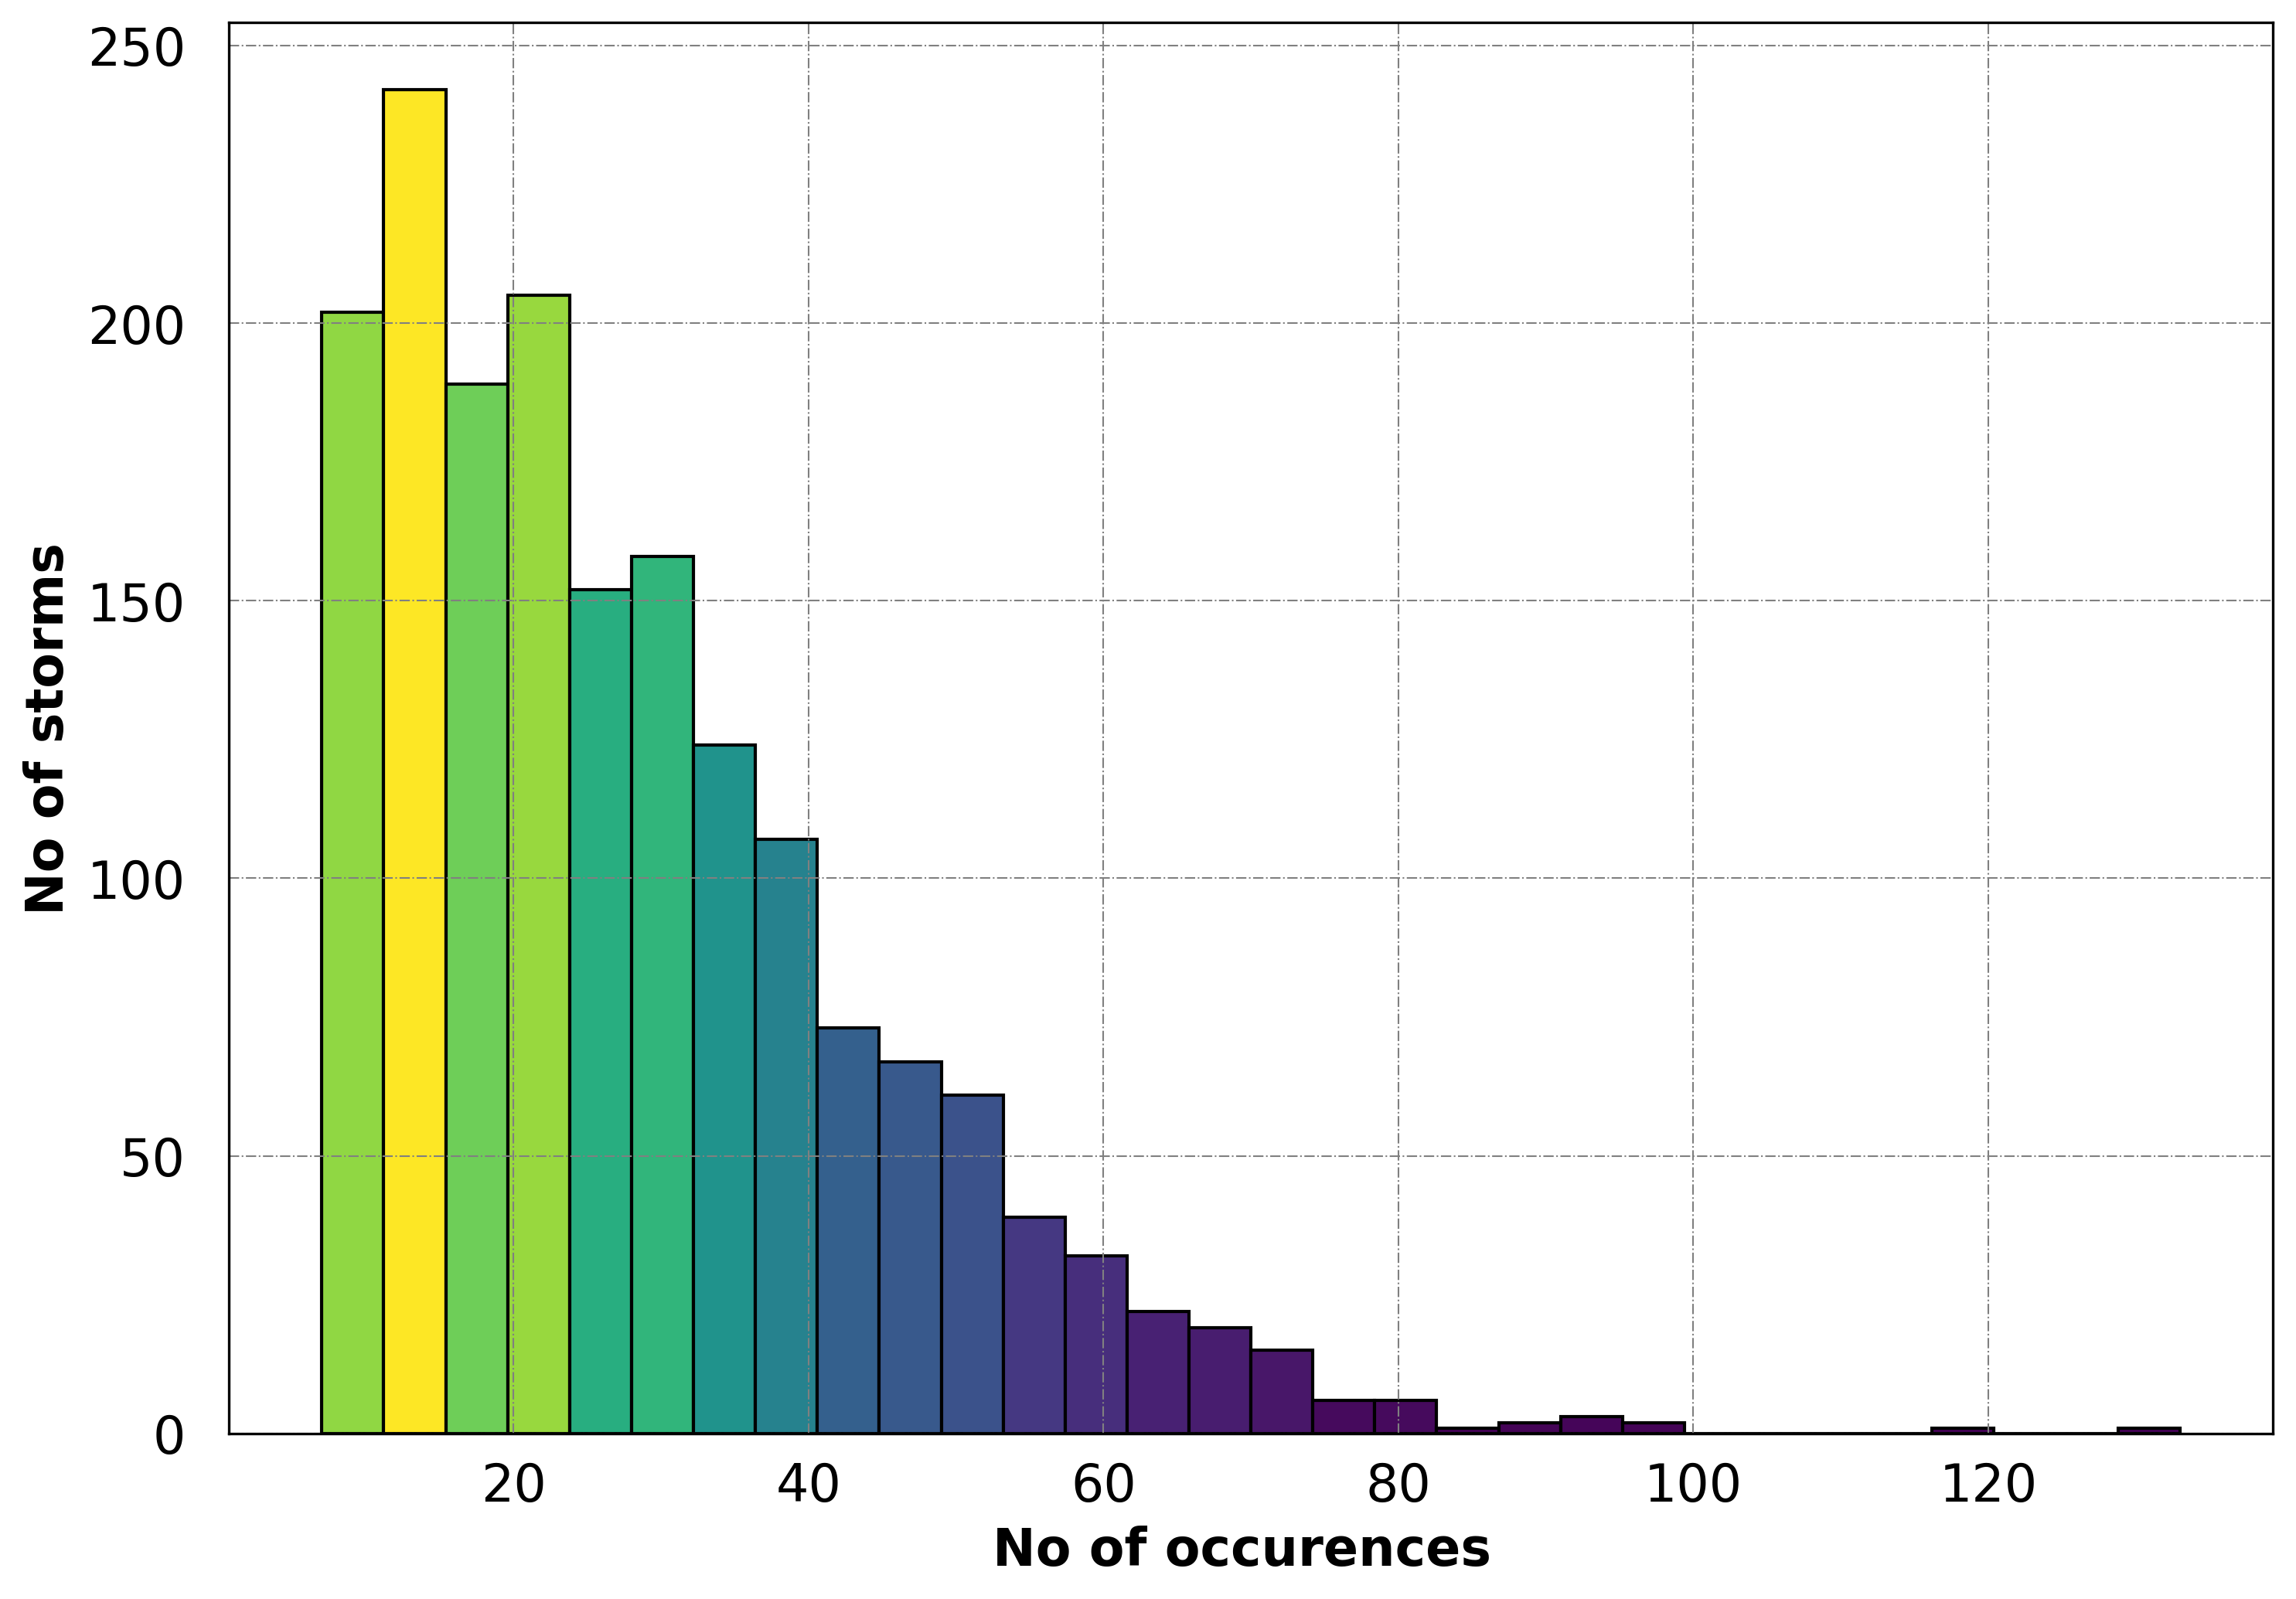

In [ ]:
#Histogram of data points per storm

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["figure.autolayout"] = True

# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        )

# Creating histogram
N, bins, patches = axs.hist(data2, bins=30,edgecolor = "black")
 
# Setting color
fracs = ((N**(1 )) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.grid(True)
axs.set_xlabel('No of occurences ', fontsize=16,fontweight='bold')
axs.set_ylabel('No of storms', fontsize=16,fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.show()


In [ ]:
data100=data.groupby(by=["ID"]).Name.count()

data100

ID
AL011851    14
AL011852    45
AL011854    11
AL011856    14
AL011857     8
            ..
AL282005    33
AL291969    17
AL292005    42
AL302005    43
AL312005    36
Name: Name, Length: 1729, dtype: int64